# Creating Summary stats tables and graphs

In [1]:
cd

C:\Users\Rafael\Eco 727 - Project\Analysis


In [2]:
%set graph_format svg --permanently



In [3]:
use "..\Data\cps2"
describe
summarize




Contains data from ..\Data\cps2.dta
  obs:     4,543,785                          
 vars:            53                          25 Jan 2022 19:20
 size:   627,042,330                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g                 survey year
serial          long    %12.0g                household serial number
month           byte    %8.0g      MONTH      month
hwtfinl         double  %12.0g                household weight, basic monthly
cpsid           double  %12.0g                cpsid, household record
asecflag        byte    %8.0g      ASECFLAG   flag for asec
mish            byte    %8.0g      MISH       month in sample, household level
region          byte    %8.0g      REGION     region and division
metro 

-------------+---------------------------------------------------------
       black |  4,543,785    .1039261    .3051647          0          1
       white |  4,543,785    .8960739    .3051647          0          1
      female |  4,543,785     .435319    .4957988          0          1
 age_squared |  4,543,785    1694.385    956.6561        324       4096
  experience |  4,543,785    19.97448    11.91775          0         58
-------------+---------------------------------------------------------
experience~d |  4,543,785    541.0123    529.3152          0       3364
   birthyear |  4,543,785    1959.927    14.95969       1917       2002
     married |  4,543,785     .606468    .4885331          0          1
      single |  4,543,785    .2455193    .4303947          0          1
    in_metro |  4,543,785    .7885851     .408312          0          1
-------------+---------------------------------------------------------
  highschool |  4,543,785    .3491745    .4767093          0    

###  We create a table for median wages in 2019. We split this table between 4-year college grads and none college grads

In [4]:
gen yearly_income = real_weekly_wage * 52 // We compute annual earnings as the real weekly wage times 52 weeks in a year
gen black_yearly_wages = yearly_income if inlist(black, 1)
gen white_yearly_wages = yearly_income if inlist(black, 0)

gen black_weekly_wages = real_weekly_wage if inlist(black, 1)
gen white_weekly_wages = real_weekly_wage if inlist(black, 0)



(4,071,567 missing values generated)

(472,218 missing values generated)

(4,071,567 missing values generated)

(472,218 missing values generated)


In [5]:
ssc install estout, replace

checking estout consistency and verifying not already installed...
all files already exist and are up to date.


In [6]:
/* Creating a table for annual median incomes in 2019*/

** Four-year college graduates
eststo graduates:estpost tabstat white_yearly_wages black_yearly_wages if inlist(year, 2019) & grade == 16, stats(median) columns(statistics)

** Non-college graduates
eststo nongraduates:estpost tabstat white_yearly_wages black_yearly_wages if inlist(year, 2019) & grade < 16, stats(median) columns(statistics)

eststo dir



Summary statistics: p50
     for variables: white_yearly_wages black_yearly_wages

             |    e(p50) 
-------------+-----------
white_year~s |  64773.93 
black_year~s |  52793.71 


Summary statistics: p50
     for variables: white_yearly_wages black_yearly_wages

             |    e(p50) 
-------------+-----------
white_year~s |  40986.89 
black_year~s |  33733.28 


-------------------------------------------------------
        name | command      depvar       npar  title 
-------------+-----------------------------------------
   graduates | estpost      no depvar       0  
nongraduates | estpost      no depvar       0  
-------------------------------------------------------


In [7]:
esttab graduates nongraduates, replace noobs nonumbers nonote main(p50 %12.0fc) ///
mtitles (" Four-year college graduates" "Non-college graduates") ///  
/*label title("Median Income in 2019") */ /// We put the tittle on overleaf
coeflabels( white_yearly_wages "White Individuals" black_yearly_wages "Black Individuals" ) ///
addnotes("SOURCE: Current Population Survey and author's calculations")


--------------------------------------------
             Four-year ~s    Non-colleg~s   
--------------------------------------------
White Indi~s       64,774          40,987   
                                            

Black Indi~s       52,794          33,733   
                                            
--------------------------------------------
SOURCE: Current Population Survey and author's calculations


In [8]:
esttab graduates nongraduates using Results/table_1.tex, replace booktabs noobs nonumbers nonote main(p50 %12.0fc) ///
mtitles (" Four-year college graduates" "Non-college graduates") ///  
/*label title("Median Income in 2019") */ /// We put the tittle on overleaf
coeflabels( white_yearly_wages "White Individuals" black_yearly_wages "Black Individuals") ///
addnotes("SOURCE: Current Population Survey and author's calculations")

(output written to Results/table_1.tex)


# Line Graphs

In [9]:
collapse (mean) black_weekly_wages white_weekly_wages (p50)black_yearly_wages (p50) white_yearly_wages, by(year)
describe
list




Contains data
  obs:            39                          
 vars:             5                          
 size:           702                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g                 survey year
black_weekly_~s float   %9.0g                 (mean) black_weekly_wages
white_weekly_~s float   %9.0g                 (mean) white_weekly_wages
black_yearly_~s float   %9.0g                 (p 50) black_yearly_wages
white_yearly_~s float   %9.0g                 (p 50) white_yearly_wages
--------------------------------------------------------------------------------
Sorted by: year
     Note: Dataset has changed since last saved.


     +--------------------------------------------------+
     | year   b~week~s   w

### We graph the median annual income from 1982-2020

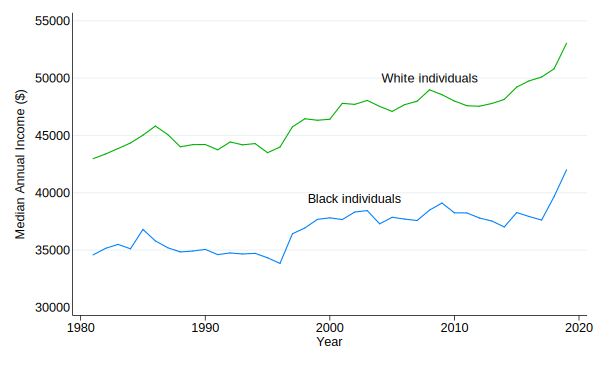





(file ..\Analysis\Results\graph_1.pdf written in PDF format)


In [10]:
/*We graph the median annual income from 1982-2020*/
generate y=year-1
line black_yearly_wage y, lcolor(midblue) || line white_yearly_wage y, lcolor(midgreen) ///
xtitle(Year) xlabel(1980(10)2020) /// 
ytitle("Median Annual Income ($)", axis(1)) ylabel(30000(5000)55000, angle(0) noticks axis(1)) ///
text(50000 2008 "White individuals") text(39500 2002 "Black individuals") ///
graphregion(color(white)) ///
legend(off) xsize(5.75) ysize(3.5) name(fig1a, replace)
graph export "..\Analysis\Results\graph_1.pdf", as(pdf) replace


### We graph the Black-White Log-Wage Differential 

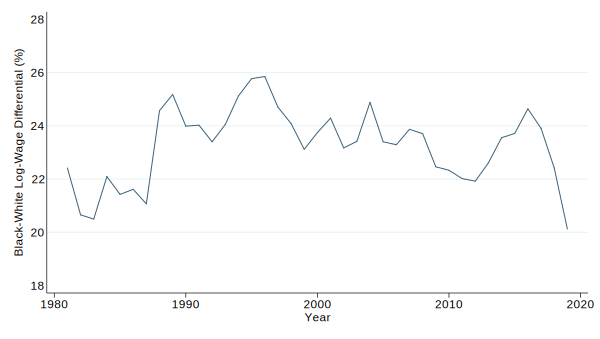





(file ..\Analysis\Results\graph_2.pdf written in PDF format)


In [11]:
/* We graph the Black-White Log-Wage Differential */
generate logdiff = (log(white_weekly_wage) - log(black_weekly_wage)) * 100 
line logdiff y, lcolor(edkblue) xtitle(Year) xlabel(1980(10)2020) ///
ytitle("Black-White Log-Wage Differential (%) ", axis(1)) ylabel(18(2)28, angle(0) noticks axis(1)) ///
graphregion(color(white)) legend(off) xsize(5.75) ysize(3.25)
graph export "..\Analysis\Results\graph_2.pdf", as(pdf) replace